# Classification and Eventually Dimensionality Reduction  

### Functions: 
- random_train_test(my_df, train_prop=.7) : randomly assigns the same class to each of the 128x128 images with a configurable train test split. Each child image (rotated and cropped) gets the same classification

Note: The index of the first large image is  df_5[86016:] 
cortex_4400_4912__720_1232_110_988.tiff



In [1]:
from skimage import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn import random_projection


import numpy as np
# import librosa
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import warnings
import pandas as pd
warnings.simplefilter('ignore', UserWarning)
%matplotlib notebook
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn import tree
from sklearn.random_projection import GaussianRandomProjection

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import IPython.display
from sklearn.svm import LinearSVC

In [2]:
root_path = '../Images/ims'
df = pd.read_csv("DataSet_V9.csv")
df = df.drop(columns=['Unnamed: 0'])

In [3]:
print(df.shape)

df.isna().sum()

(92160, 21)


fname                           0
Entropy Mean                    0
Entropy Variance                0
Entropy Sum                     0
label                       86016
Number of Events            87040
Max Area                    87040
Average Area                87040
Avg % Diff Width Height     87040
Max % Diff Width Height     87040
Shape Index Mean                0
Shape Index Variance            0
Shape Index Sum                 0
Pixel Intensity Mean            0
Pixel Intensity Variance        0
Pixel Intensity Sum             0
class                           0
train                           0
HOG Mean                        0
HOG Variance                    0
HOG Sum                         0
dtype: int64

In [4]:
# a[a['fname'].str.contains('thalamus_650_1162__600_1112_159_172')].shape

### Reformat the np array into a dataframe. Make a train column to mark train vs test. 

In [5]:
def random_train_test(my_df, train_prop=.7):
    df_temp = my_df.copy()
    if "train" not in df_temp.columns:
        df_temp["train"] = np.nan
    
    df_large = df_temp[86016:] #all 128x128s
    print(df_large.shape, 'should equal 6144')
    
    #only train test split the df_large
    df_large["train"] = np.random.choice([1, 0], len(df_large), p=[train_prop, (1-train_prop)])
    df_large['fname'] = df_large['fname'].str.replace(r'images/','')
    
    
    #update all of the coclumns to match
    # so all children of large image get the same train test label
    for idx in range(0,6144): #for every 128x128 6144
        start_idx = idx*14 # 0 to 13
        end_idx = (start_idx + 13)
        df_temp.loc[start_idx:end_idx]['train'] = df_temp.loc[86016+idx]['train']
    
    return(df_temp)
# df = random_train_test(df,.7 )

In [6]:
# df
# df.columns = ['fname','Entropy1','Entropy2','Entropy3']
# df["train"] = np.random.choice([1, 0], len(df), p=[0.7, 0.3])

In [7]:
# df

In [8]:
df['class'] = np.nan
df['class'] = np.where(df['fname'].str.contains("thalamus"), 1, df['class']).astype(int)
df['class'] = np.where(df['fname'].str.contains("cortex"), 2, df['class']).astype(int)
df['class'] = np.where(df['fname'].str.contains("str"), 3, df['class']).astype(int)

In [9]:
df

,fname,Entropy Mean,Entropy Variance,Entropy Sum,label,Number of Events,Max Area,Average Area,Avg % Diff Width Height,Max % Diff Width Height,...,Shape Index Variance,Shape Index Sum,Pixel Intensity Mean,Pixel Intensity Variance,Pixel Intensity Sum,class,train,HOG Mean,HOG Variance,HOG Sum
0,cortex_4400_4912__720_1232_110_988tile1.tiff,5.253974,0.092016,21520.275982,NaN,NaN,NaN,NaN,NaN,NaN,...,0.245402,297.806247,98.617432,559.998905,403937.0,2,0,0.115039,0.041565,471.200566
1,cortex_4400_4912__720_1232_110_988tile2.tiff,5.178819,0.085072,21212.441308,NaN,NaN,NaN,NaN,NaN,NaN,...,0.248322,314.549026,96.067383,469.289405,393492.0,2,0,0.104810,0.035965,429.301677
2,cortex_4400_4912__720_1232_110_988tile3.tiff,5.172968,0.101148,21188.477362,NaN,NaN,NaN,NaN,NaN,NaN,...,0.243454,320.832122,103.660889,461.527826,424595.0,2,0,0.111318,0.043023,455.960095
3,cortex_4400_4912__720_1232_110_988tile4.tiff,5.099683,0.134162,20888.301343,NaN,NaN,NaN,NaN,NaN,NaN,...,0.249819,288.249616,99.208252,443.160977,406357.0,2,0,0.099454,0.034068,407.362141
4,cortex_4400_4912__720_1232_110_988turn0.tiff,5.162050,0.062711,21143.754782,NaN,NaN,NaN,NaN,NaN,NaN,...,0.250467,318.521426,98.367188,435.089294,402912.0,2,0,0.103424,0.034386,423.624939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92155,thalamus_650_1162__600_1112_159_372.tiff,5.322150,0.099675,87198.112086,1.0,17.0,2400.0,592.647059,0.358875,0.909091,...,0.241182,705.451548,134.625488,764.947632,2205704.0,1,0,0.123205,0.057248,2018.585825
92156,thalamus_650_1162__600_1112_159_808.tiff,5.504534,0.072802,90186.282155,1.0,34.0,13440.0,576.941176,0.281709,1.180723,...,0.244892,662.934041,140.707153,1179.133845,2305346.0,1,1,0.151432,0.076101,2481.065814
92157,thalamus_650_1162__600_1112_159_777.tiff,5.183571,0.155895,84927.624681,1.0,17.0,4371.0,537.764706,0.341893,1.025641,...,0.243723,660.369406,125.146606,1186.917838,2050402.0,1,1,0.117043,0.052216,1917.634279
92158,thalamus_650_1162__600_1112_159_529.tiff,5.140849,0.093252,84227.666171,1.0,14.0,700.0,268.000000,0.222357,0.536585,...,0.245582,723.169775,129.455933,391.979015,2121006.0,1,1,0.107435,0.040212,1760.215770


If we were going to use sklearn, we would use this for a train test split. However, 
because we have specific preprocessing steps linking the 128x128 patch to its children 
we do our own train test split above

In [10]:
# ent_all_feats = df.as_matrix(columns=df.columns[1:4])
# ent_all_labels = np.asarray(df['class']).reshape(-1,1)

# ent_all_feats.shape, ent_all_labels.shape

# ent_train, ent_test, labels_train, labels_test = train_test_split(ent_all_feats, ent_all_labels, 
#                                     test_size=0.3, random_state=2)

In [11]:
df.columns
df = df.drop(columns=['label',
       'Number of Events', 'Max Area', 'Average Area',
       'Avg % Diff Width Height', 'Max % Diff Width Height'])
df.head()

,fname,Entropy Mean,Entropy Variance,Entropy Sum,Shape Index Mean,Shape Index Variance,Shape Index Sum,Pixel Intensity Mean,Pixel Intensity Variance,Pixel Intensity Sum,class,train,HOG Mean,HOG Variance,HOG Sum
0,cortex_4400_4912__720_1232_110_988tile1.tiff,5.253974,0.092016,21520.275982,0.072707,0.245402,297.806247,98.617432,559.998905,403937.0,2,0,0.115039,0.041565,471.200566
1,cortex_4400_4912__720_1232_110_988tile2.tiff,5.178819,0.085072,21212.441308,0.076794,0.248322,314.549026,96.067383,469.289405,393492.0,2,0,0.104810,0.035965,429.301677
2,cortex_4400_4912__720_1232_110_988tile3.tiff,5.172968,0.101148,21188.477362,0.078328,0.243454,320.832122,103.660889,461.527826,424595.0,2,0,0.111318,0.043023,455.960095
3,cortex_4400_4912__720_1232_110_988tile4.tiff,5.099683,0.134162,20888.301343,0.070373,0.249819,288.249616,99.208252,443.160977,406357.0,2,0,0.099454,0.034068,407.362141
4,cortex_4400_4912__720_1232_110_988turn0.tiff,5.162050,0.062711,21143.754782,0.077764,0.250467,318.521426,98.367188,435.089294,402912.0,2,0,0.103424,0.034386,423.624939


Gets the train/test matricies for features and labels according to train test split

In [12]:
all_features = df.drop(columns=['fname', 'train',  'class'])
all_labels = df['class']


feat_train = df[df['train'] == 1].drop(columns=['fname', 'train',  'class']).as_matrix()
feat_train.shape
feat_test = df[df['train'] == 0].drop(columns=['fname', 'train',  'class']).as_matrix()
feat_test.shape 
label_train = df[df['train'] == 1]['class'].as_matrix().reshape(-1,1)
label_test = df[df['train'] == 0]['class'].as_matrix().reshape(-1,1)
feat_test.shape, feat_train.shape, label_train.shape


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


((27555, 12), (64605, 12), (64605, 1))

In [13]:
df[df['train'] == 1].drop(columns=['fname', 'train',  'class'])
# validating that not feeding in train data

,Entropy Mean,Entropy Variance,Entropy Sum,Shape Index Mean,Shape Index Variance,Shape Index Sum,Pixel Intensity Mean,Pixel Intensity Variance,Pixel Intensity Sum,HOG Mean,HOG Variance,HOG Sum
14,5.200104,0.080674,21299.626381,0.075242,0.245741,308.192834,100.876465,468.930052,413190.0,0.113452,0.042072,464.700013
15,5.187820,0.098317,21249.310654,0.064882,0.253480,265.756969,98.016602,560.520232,401476.0,0.104884,0.036105,429.605459
16,5.184719,0.115901,21236.607451,0.067428,0.248342,276.186371,103.700439,527.388047,424757.0,0.112454,0.043908,460.611436
17,5.027991,0.139392,20594.650285,0.082096,0.240165,336.264796,102.910889,333.912713,421523.0,0.094780,0.031166,388.219733
18,5.083024,0.104495,20820.064723,0.077667,0.246599,318.124744,102.087891,359.630459,418152.0,0.096910,0.033023,396.945229
...,...,...,...,...,...,...,...,...,...,...,...,...
92154,5.053554,0.141893,82797.426992,0.047120,0.244652,772.013909,130.310547,453.475338,2135008.0,0.098950,0.036898,1621.195619
92156,5.504534,0.072802,90186.282155,0.040462,0.244892,662.934041,140.707153,1179.133845,2305346.0,0.151432,0.076101,2481.065814
92157,5.183571,0.155895,84927.624681,0.040306,0.243723,660.369406,125.146606,1186.917838,2050402.0,0.117043,0.052216,1917.634279
92158,5.140849,0.093252,84227.666171,0.044139,0.245582,723.169775,129.455933,391.979015,2121006.0,0.107435,0.040212,1760.215770


In [14]:
feat_train


array([[5.20010410e+00, 8.06736538e-02, 2.12996264e+04, ...,
        1.13452152e-01, 4.20721747e-02, 4.64700013e+02],
       [5.18781998e+00, 9.83166627e-02, 2.12493107e+04, ...,
        1.04884145e-01, 3.61046187e-02, 4.29605459e+02],
       [5.18471862e+00, 1.15900736e-01, 2.12366075e+04, ...,
        1.12453964e-01, 4.39075840e-02, 4.60611436e+02],
       ...,
       [5.18357084e+00, 1.55895211e-01, 8.49276247e+04, ...,
        1.17043108e-01, 5.22160193e-02, 1.91763428e+03],
       [5.14084877e+00, 9.32521335e-02, 8.42276662e+04, ...,
        1.07435045e-01, 4.02117691e-02, 1.76021577e+03],
       [4.97532181e+00, 1.28578171e-01, 8.15156726e+04, ...,
        9.27190185e-02, 3.26209614e-02, 1.51910840e+03]])

## Scale

In [15]:


scaler = StandardScaler()
scaler.fit(feat_train)
ent_train = scaler.transform(feat_train)
ent_test = scaler.transform(feat_test)

In [16]:
# ent_train
label_train.shape, label_test.shape, feat_train.shape, ent_train.shape, ent_test.shape

((64605, 1), (27555, 1), (64605, 12), (64605, 12), (27555, 12))

In [17]:
print(ent_train[2])
print(label_train[2])

[ 0.30352385 -0.33492748 -0.25410988 -0.90877759  0.91455125 -1.00871216
 -1.28187668 -0.47216018 -0.4278292   0.25322174  0.07282118 -0.20654455]
[2]


## Train models and score

In [18]:
knn = KNeighborsClassifier(n_neighbors=3).fit(ent_train, label_train)
k_train = knn.score(ent_train, label_train)
k_test = knn.score(ent_test, label_test)
print('knn', k_test)


svm = LinearSVC().fit(ent_train, label_train)
s_train = svm.score(ent_train, label_train)
s_test = svm.score(ent_test, label_test)
print('svm', s_test)

ksvm = SVC(gamma=.005, kernel='rbf').fit(ent_train, label_train)
kern_s_train = ksvm.score(ent_train, label_train)
kern_s_test = ksvm.score(ent_test, label_test)
print('ksvm', kern_s_test)


dtree = tree.DecisionTreeClassifier(max_leaf_nodes=3).fit(ent_train, label_train)
d_train = dtree.score(ent_train, label_train)
d_test = dtree.score(ent_test, label_test)
print('dt', d_test)

# new_result_train = old_result_train[['Component0', 'Component1','Component2']]
lr = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42).fit(ent_train, label_train)
log_train = lr.score(ent_train, label_train)
log_test = lr.score(ent_test, label_test)
print('lr', log_test)

knn 0.9763382326256578
svm 0.9035020867356197
ksvm 0.9469424786790056
dt 0.8264198874977318


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


lr 0.9052077662856106


In [19]:
report_dict = {'Train Acc': [log_train, k_train, s_train, kern_s_train,d_train], 
               'Test Acc': [log_test, k_test, s_test, kern_s_test, d_test], 
               'Name': ['LR', 'kNN', 'SVM', 'KSVM', 'DT']}
report_df = pd.DataFrame(data=report_dict)
report_df.set_index('Name', inplace=True)
print("Classification Using Engineered Features")
report_df

Classification Using Engineered Features


,Train Acc,Test Acc
Name,,
LR,0.902670,0.905208
kNN,0.995310,0.976338
SVM,0.901679,0.903502
KSVM,0.948332,0.946942
DT,0.834239,0.826420


## Dim reduction


In [21]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [22]:
%matplotlib notebook
%matplotlib notebook

In [28]:
%matplotlib notebook
%matplotlib notebook

In [24]:
def plot_3d(result, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    colors = {1:'m', 2:'y', 3:'b'}

    ax.scatter(result['Component0'], result['Component1'], result['Component2'], 
               c=result['label'].apply(lambda x: colors[x]), s=60)
    xAxisLine = ((min(result['Component0']), max(result['Component0'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(result['Component1']), max(result['Component1'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
    zAxisLine = ((0, 0), (0,0), (min(result['Component2']), max(result['Component2'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

    # label the axes
    ax.set_xlabel("Component1")
    ax.set_ylabel("Component2")
    ax.set_zlabel("Component3")
    ax.set_title(title)

In [25]:
def plot_crosses(result, title):
    colors = {1:'m', 2:'y', 3:'b'}
    fig, axes = plt.subplots(1, 3, figsize=(9, 3))
    fig.suptitle(title, fontsize=16)
    fig.subplots_adjust(top=0.8)
    axes[0].scatter(result['Component0'], result['Component1'], 
                    c=result['label'].apply(lambda x: colors[x]), s=60)
    axes[0].set_title('Comp. 0 vs 1')
    axes[1].scatter(result['Component1'], result['Component2'], 
                    c=result['label'].apply(lambda x: colors[x]), s=60)
    axes[1].set_title('Comp. 1 vs 2')
    axes[2].scatter(result['Component0'], result['Component2'], 
                    c=result['label'].apply(lambda x: colors[x]), s=60)
    axes[2].set_title('Comp. 0 vs 2')
    plt.show()
    

<IPython.core.display.Javascript object>


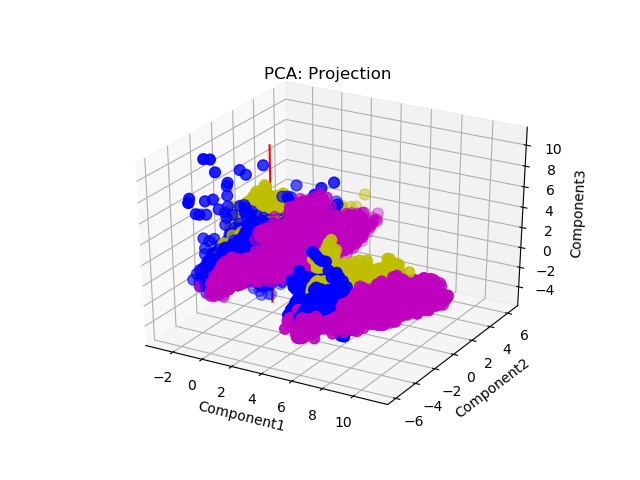

In [26]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(ent_train)
result_pca =pd.DataFrame(pca_features, columns=['Component%i' % i for i in range(3)])
result_pca['label'] = label_train

plot_3d(result_pca, "PCA: Projection")

<IPython.core.display.Javascript object>


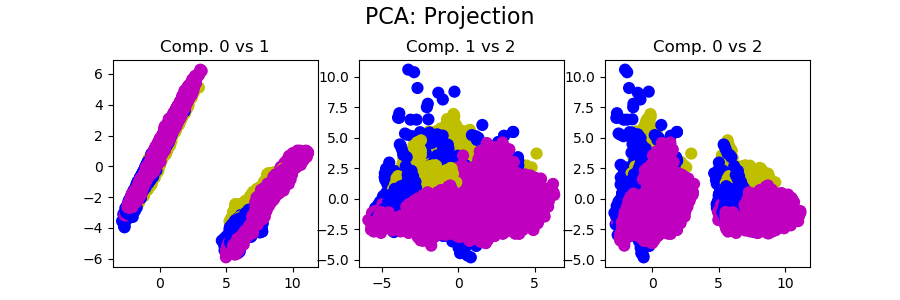

In [27]:
plot_crosses(result_pca, "PCA: Projection")

In [29]:
result_pca

,Component0,Component1,Component2,label
0,-0.446814,0.182321,1.266593,2
1,-0.576724,-0.446355,2.772940,2
2,-0.361330,0.135201,1.899558,2
3,-1.507316,-1.384467,0.128860,2
4,-1.163292,-1.068442,1.050009,2
...,...,...,...,...
64600,6.737304,-4.243172,-2.015346,1
64601,10.512207,0.629397,-1.151657,1
64602,7.682008,-2.307140,-0.617308,1
64603,7.193306,-3.494897,-1.674635,1


<IPython.core.display.Javascript object>


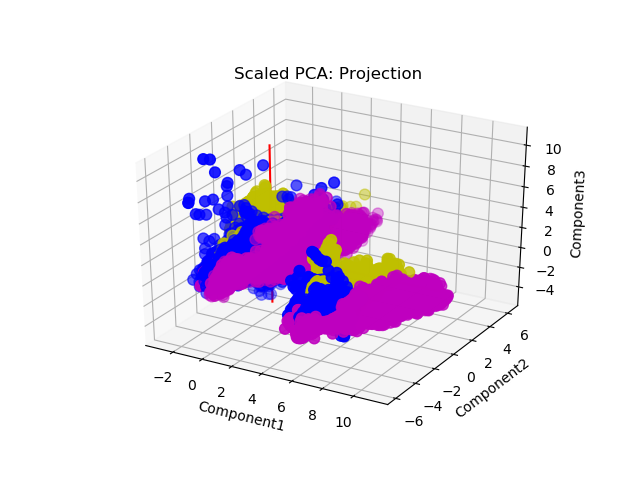

In [30]:
# pca_features = PCA(n_components=3).fit_transform(stacked_chroma)
spca = PCA(n_components=3)
spca_features = spca.fit_transform(StandardScaler().fit_transform(ent_train))
scaled_result=pd.DataFrame(spca_features, columns=['Component%i' % i for i in range(3)])
scaled_result['label'] = label_train

plot_3d(scaled_result, "Scaled PCA: Projection")

In [ ]:
# kPCA = KernelPCA(n_components=3, kernel='rbf', gamma=.00001, fit_inverse_transform=True)
# kernel_result = kPCA.fit_transform(ent_train)#.transform(mel_train)


# kernel_result=pd.DataFrame(kernel_result, columns=['Component%i' % i for i in range(3)])
# kernel_result['label'] = labels_train
# plot_3d(kernel_result, "KPCA: Projection")

In [31]:
# sckPCA = KernelPCA(n_components=3, kernel='rbf', gamma=.0005, fit_inverse_transform=True)
# sckernel_result = sckPCA.fit_transform(StandardScaler().fit_transform(ent_train))
# sckernel_result=pd.DataFrame(sckernel_result, columns=['Component%i' % i for i in range(3)])

# sckernel_result['label'] = label_train
# plot_3d(sckernel_result, "Kernel Scaled PCA")

In [32]:
from sklearn.random_projection import GaussianRandomProjection
GRP = GaussianRandomProjection(n_components=3,eps = 0.5, random_state=2019)
grp_result = GRP.fit_transform(ent_train)

grp_result = pd.DataFrame({'Component0': grp_result.T[0], 'Component1':grp_result.T[1],'Component2':grp_result.T[2]})
grp_result['label'] = label_train
plot_3d(grp_result, "GRP: Projection")

<IPython.core.display.Javascript object>

In [33]:
plot_3d(result_pca, "PCA Proj")
# plot_3d(result_pca, "PCA Proj")
plot_3d(scaled_result, "Scaled PCA Proj")
plot_3d(grp_result, "GRP Proj")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
plot_crosses(result_pca, "PCA Proj")
plot_crosses(scaled_result, "Scaled PCA Proj")
# plot_crosses(kernel_result, "KPCA: Chromagram")
# plot_crosses(sckernel_result, "scKPCA Proj")
# plot_crosses(mds_result, "MDS: Cromagram")
# plot_crosses(iso_result, "ISOMAP: Chromagram")
plot_crosses(grp_result, "GRP Proj")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Test accuracy after using PCA

In [35]:
def log_reg_pred(data_type, old_result_train, model): #model is the fitted reducer
    new_test = model.transform(data_type) #project to 3d
    new_result_train = old_result_train[['Component0', 'Component1','Component2']]
    lr = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42).fit(new_result_train, labels_train)
    a = lr.score(new_result_train, labels_train)
    b = lr.score(new_test, labels_test)
    return(a, b)

def kNN_pred(data_type,old_result_train, model):
    new_test = model.transform(data_type)
    new_result_train = old_result_train[['Component0', 'Component1','Component2']]
    knn = KNeighborsClassifier(n_neighbors=3).fit(new_result_train, labels_train)
    a = knn.score(new_result_train, labels_train)
    b = knn.score(new_test, labels_test)
    return(a, b)

from sklearn.svm import LinearSVC


def svm_pred(data_type,old_result_train, model):
    new_test = model.transform(data_type)
    new_result_train = old_result_train[['Component0', 'Component1','Component2']]
    svm = LinearSVC().fit(new_result_train, labels_train)
    a = svm.score(new_result_train, labels_train)
    b = svm.score(new_test, labels_test)
    return(a, b)

def kernel_svm_pred(data_type,old_result_train, model,gamma_in='auto'):
    new_test = model.transform(data_type)
    new_result_train = old_result_train[['Component0', 'Component1','Component2']]
    svm = SVC(gamma=gamma_in, kernel='rbf').fit(new_result_train, labels_train)
    a = svm.score(new_result_train, labels_train)
    b = svm.score(new_test, labels_test)
    return(a, b)

def dt_pred(data_type,old_result_train, model):
    new_test = model.transform(data_type)
    new_result_train = old_result_train[['Component0', 'Component1','Component2']]
    dtree = tree.DecisionTreeClassifier(max_leaf_nodes=3).fit(new_result_train, labels_train)
    a = dtree.score(new_result_train, labels_train)
    b = dtree.score(new_test, labels_test)
    a = dtree.score(new_result_train, labels_train)
    b = dtree.score(new_test, labels_test)
    return(a, b)
# clf = tree.DecisionTreeClassifier()

In [36]:
# log_train, log_test = log_reg_pred(ent_test, sckernel_result, sckPCA) 
# #data to project, already projected data, 
# k_train, k_test = kNN_pred(ent_test,sckernel_result, sckPCA)

# s_train, s_test = svm_pred(ent_test,sckernel_result, sckPCA)
# kern_s_train, kern_s_test = kernel_svm_pred(ent_test,sckernel_result, sckPCA)

# d_train, d_test = dt_pred(ent_test, sckernel_result, sckPCA)

In [37]:
# report_dict = {'Train Acc': [log_train, k_train, s_train, kern_s_train,d_train], 
#                'Test Acc': [log_test, k_test, s_test, kern_s_test, d_test], 
#                'Name': ['LR', 'kNN', 'SVM', 'KSVM', 'DT']}
# report_df = pd.DataFrame(data=report_dict)
# report_df.set_index('Name', inplace=True)
# print("Chromagram Kernel PCA")
# report_df

In [38]:
labels_train = label_train
labels_test = label_test

In [39]:
# result_pca , pca

pca = PCA(n_components=3).fit(StandardScaler().fit_transform(ent_train))
print(PCA)
pca_feature_train = pca.transform(ent_train)
pca_feature_test = pca.transform(ent_test)


result_pca =pd.DataFrame(pca_features, columns=['Component%i' % i for i in range(3)])
result_pca['label'] = labels_train

<class 'sklearn.decomposition.pca.PCA'>


In [40]:
print(pca_feature_train[2], label_train[2])

[-0.36132991  0.1352012   1.8995579 ] [2]


In [41]:
knn = KNeighborsClassifier(n_neighbors=3).fit(pca_feature_train, label_train)
k_train = knn.score(pca_feature_train, label_train)
k_test = knn.score(pca_feature_test, label_test)
print('knn', k_test)


svm = LinearSVC().fit(pca_feature_train, label_train)
s_train = svm.score(pca_feature_train, label_train)
s_test = svm.score(pca_feature_test, label_test)
print('svm', s_test)

ksvm = SVC(gamma=.0005, kernel='rbf').fit(pca_feature_train, label_train)
kern_s_train = ksvm.score(pca_feature_train, label_train)
kern_s_test = ksvm.score(pca_feature_test, label_test)
print('ksvm', kern_s_test)


dtree = tree.DecisionTreeClassifier(max_leaf_nodes=3).fit(pca_feature_train, label_train)
d_train = dtree.score(pca_feature_train, label_train)
d_test = dtree.score(pca_feature_test, label_test)
print('dt', d_test)

# new_result_train = old_result_train[['Component0', 'Component1','Component2']]
lr = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42).fit(pca_feature_train, label_train)
log_train = lr.score(pca_feature_train, label_train)
log_test = lr.score(pca_feature_test, label_test)
print('lr', log_test)

knn 0.7280711304663401
svm 0.6798040283070224
ksvm 0.6862275449101797
dt 0.5948829613500273


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


lr 0.6813282525857376


In [44]:
def fit_red_models(reduced_feats_train, reduced_feats_test):
    knn = KNeighborsClassifier(n_neighbors=3).fit(reduced_feats_train, label_train)
    k_train = knn.score(reduced_feats_train, label_train)
    k_test = knn.score(reduced_feats_test, label_test)
    print('knn', k_test)


    svm = LinearSVC().fit(reduced_feats_train, label_train)
    s_train = svm.score(reduced_feats_train, label_train)
    s_test = svm.score(reduced_feats_test, label_test)
    print('svm', s_test)

    ksvm = SVC(gamma=.0005, kernel='rbf').fit(reduced_feats_train, label_train)
    kern_s_train = ksvm.score(reduced_feats_train, label_train)
    kern_s_test = ksvm.score(reduced_feats_test, label_test)
    print('ksvm', kern_s_test)


    dtree = tree.DecisionTreeClassifier(max_leaf_nodes=3).fit(reduced_feats_train, label_train)
    d_train = dtree.score(reduced_feats_train, label_train)
    d_test = dtree.score(reduced_feats_test, label_test)
    print('dt', d_test)

    # new_result_train = old_result_train[['Component0', 'Component1','Component2']]
    lr = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42).fit(reduced_feats_train, label_train)
    log_train = lr.score(reduced_feats_train, label_train)
    log_test = lr.score(reduced_feats_test, label_test)
    print('lr', log_test)
    
    
    return(log_train, k_train, s_train, kern_s_train,d_train,log_test, k_test, s_test, kern_s_test, d_test)

In [45]:
log_train, k_train, s_train, kern_s_train,d_train,log_test, 
k_test, s_test, kern_s_test, 
d_test = fit_red_models(pca_feature_train, pca_feature_test);



knn 0.7280711304663401
svm 0.6798040283070224
ksvm 0.6862275449101797
dt 0.5948829613500273


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


lr 0.6813282525857376


In [46]:
report_dict = {'Train Acc': [log_train, k_train, s_train, kern_s_train,d_train], 
               'Test Acc': [log_test, k_test, s_test, kern_s_test, d_test], 
               'Name': ['LR', 'kNN', 'SVM', 'KSVM', 'DT']}
report_df = pd.DataFrame(data=report_dict)
report_df.set_index('Name', inplace=True)
print("PCA: 5 PCs")
report_df

PCA: 3 PCs


,Train Acc,Test Acc
Name,,
LR,0.671403,0.681328
kNN,0.935918,0.728071
SVM,0.670583,0.679804
KSVM,0.680303,0.686228
DT,0.599598,"(0.6714031421716585, 0.9359182725795218, 0.670..."


### do with 5 PCS


In [47]:
pca = PCA(n_components=5).fit(StandardScaler().fit_transform(ent_train))
print(PCA)
pca_feature_train = pca.transform(ent_train)
pca_feature_test = pca.transform(ent_test)


result_pca =pd.DataFrame(pca_features, columns=['Component%i' % i for i in range(3)])
result_pca['label'] = labels_train

<class 'sklearn.decomposition.pca.PCA'>


In [48]:
log_train, k_train, s_train, kern_s_train,d_train,log_test, 
k_test, s_test, kern_s_test, 
d_test = fit_red_models(pca_feature_train, pca_feature_test);


knn 0.9186717474142624
svm 0.8167664670658683
ksvm 0.856396298312466
dt 0.7651242968608238


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


lr 0.8193431319179822


In [49]:
report_dict = {'Train Acc': [log_train, k_train, s_train, kern_s_train,d_train], 
               'Test Acc': [log_test, k_test, s_test, kern_s_test, d_test], 
               'Name': ['LR', 'kNN', 'SVM', 'KSVM', 'DT']}
report_df = pd.DataFrame(data=report_dict)
report_df.set_index('Name', inplace=True)
print("PCA: 5 PCs")
report_df

PCA: 5 PCs


,Train Acc,Test Acc
Name,,
LR,0.671403,0.681328
kNN,0.935918,0.728071
SVM,0.670583,0.679804
KSVM,0.680303,0.686228
DT,0.599598,"(0.8113768284188531, 0.9831282408482316, 0.811..."


In [ ]:
# log_train, log_test = log_reg_pred(ent_test, result_pca , pca) 
# #data to project, already projected data, 
# k_train, k_test = kNN_pred(ent_test,result_pca , pca)

# s_train, s_test = svm_pred(ent_test,result_pca , pca)
# kern_s_train, kern_s_test = kernel_svm_pred(ent_test,result_pca , pca)

# d_train, d_test = dt_pred(ent_test, result_pca , pca)

In [ ]:
# report_dict = {'Train Acc': [log_train, k_train, s_train, kern_s_train,d_train], 
#                'Test Acc': [log_test, k_test, s_test, kern_s_test, d_test], 
#                'Name': ['LR', 'kNN', 'SVM', 'KSVM', 'DT']}
# report_df = pd.DataFrame(data=report_dict)
# report_df.set_index('Name', inplace=True)
# print("Chromagram Kernel PCA")
# report_df

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=3).fit(ent_train, label_train)
# k_train = knn.score(ent_train, label_train)
# k_test = knn.score(ent_test, label_test)
# print('knn', k_test)


# svm = LinearSVC().fit(ent_train, label_train)
# s_train = svm.score(ent_train, label_train)
# s_test = svm.score(ent_test, label_test)
# print('svm', s_test)

# ksvm = SVC(gamma=.005, kernel='rbf').fit(ent_train, label_train)
# kern_s_train = ksvm.score(ent_train, label_train)
# kern_s_test = ksvm.score(ent_test, label_test)
# print('ksvm', kern_s_test)


# dtree = tree.DecisionTreeClassifier(max_leaf_nodes=3).fit(ent_train, label_train)
# d_train = dtree.score(ent_train, label_train)
# d_test = dtree.score(ent_test, label_test)
# print('dt', d_test)

# # new_result_train = old_result_train[['Component0', 'Component1','Component2']]
# lr = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42).fit(ent_train, label_train)
# log_train = lr.score(ent_train, label_train)
# log_test = lr.score(ent_test, label_test)
# print('lr', lpog_test)

In [ ]:
# def plot_3d(result, title):
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
    
#     colors = {1:'m', 2:'y', 3:'b'}

#     ax.scatter(result['Component0'], result['Component1'], result['Component2'], 
#                c=result['label'].apply(lambda x: colors[x]), s=60)
#     xAxisLine = ((min(result['Component0']), max(result['Component0'])), (0, 0), (0,0))
#     ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
#     yAxisLine = ((0, 0), (min(result['Component1']), max(result['Component1'])), (0,0))
#     ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
#     zAxisLine = ((0, 0), (0,0), (min(result['Component2']), max(result['Component2'])))
#     ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

#     # label the axes
#     ax.set_xlabel("Component1")
#     ax.set_ylabel("Component2")
#     ax.set_zlabel("Component3")
#     ax.set_title(title)